In [0]:

dbutils.library.installPyPI('h2o-pysparkling-2.4')


Out[1]: True

In [0]:
from pysparkling import * # Import PySparkling
import h2o
hc = H2OContext.getOrCreate()

Connecting to H2O server at http://10.139.64.8:9009 ... successful.
-------------------------- -------------------------------------------------------------------------------------------------------
H2O_cluster_uptime: 19 secs
H2O_cluster_timezone: Etc/UTC
H2O_data_parsing_timezone: UTC
H2O_cluster_version: 3.32.0.1
H2O_cluster_version_age: 1 month
H2O_cluster_name: sparkling-water-root_app-20201109023413-0000
H2O_cluster_total_nodes: 4
H2O_cluster_free_memory: 25.29 Gb
H2O_cluster_total_cores: 16
H2O_cluster_allowed_cores: 16
H2O_cluster_status: locked, healthy
H2O_connection_url: http://10.139.64.8:9009
H2O_connection_proxy: null
H2O_internal_security: False
H2O_API_Extensions: XGBoost, Algos, Amazon S3, Sparkling Water REST API Extensions, AutoML, Core V3, TargetEncoder, Core V4
Python_version: 3.7.3 final
-------------------------- -------------------------------------------------------------------------------------------------------

Sparkling Water Context:
 * Sparkling Water Version: 3.32.0.1-2-2.4
 * H2O name: root
 * cluster size: 4
 * list of used nodes:
 (executorId, host, port)
 ------------------------
 (0,10.139.64.4,54321)
 (1,10.139.64.5,54321)
 (2,10.139.64.6,54321)
 (3,10.139.64.7,54321)
 ------------------------

 Open H2O Flow in browser: https://westeurope.azuredatabricks.net/driver-proxy/o/8767374559588946/1016-113926-refer971/9009/flow/index.html (CMD + click in Mac OSX)

In [0]:
import pandas as pd

spark.conf.set("spark.sql.execution.arrow.enabled", "false")
from pyspark.sql.functions import *
import warnings
warnings.filterwarnings("ignore")

In [0]:
#importing my libraries
from pysparkling.ml import H2OAutoML
from pyspark.ml import Pipeline
from pyspark.ml.feature import SQLTransformer

In [0]:
df=spark.table('churn.train_data_2019_2020_all_loc')
df.show()

+-------+---------+--------------------+----------------------+-------------------------+--------------------------------+-----------------------------------------+------------------------+----------------+--------------------+-------------------------------+------------------------+-------------------------+-----------------------+--------------------------+-----------+------+------------+-----------+----------------+---------------+---------------+---------------+------------------+-------------------------------+--------------------------+----------------------+---------------------------+----------------------+--------------------------------------+--------------------------+------------------------+--------------+-------------+------------+----------+----+--------------+-------------+------+----------+-------+-----------+--------------+-----------------------------+---------------------+---------------+--------------------------------------+---------+---------+---------------------------+--------------------------------------+-------------+------------------------+----------+-----------+-------------+
user_id|tag_churn|total_owned_products|total_paid_for_product|num_distinct_merchant_ids|num_distinct_merchant_categories|num_days_before_endyear_active_redemption|diff_num_months_1st_last|avg_recency_days|median_monthly_spend|total_monthly_spend_redemptions|num_of_weeks_redemptions|num_of_months_redemptions|num_of_days_redemptions|count_of_total_redemptions|total_spend|gender|tenure_inapp|has_connect|has_redem_buffet|count_num_areas|min_spend_redem|max_spend_redem|median_spend_redem|median_num_days_permonth_active|avg_weekly_sessions_active|total_sessions_monthly|avg_monthly_sessions_active|avg_recency_days_inapp|num_days_before_endyear_active_session|num_distinct_months_active|num_distinct_days_active|total_sessions|advancesearch|categoryhome|favourites|home|merchantdetail|notifications|offers|offerslist|product|quicksearch|redemptioncard|num_days_before_end_purchased|offertime_of_purchase|tag_nationality|percentage_activity_of_redeem_appvisit|age_group| cor_tag|num_of_merchants_interacted|percentage_of_merchants_redeem_present|zero_redeemer|is_savings_morethan_paid|updated_on|location_id|location_name|
+-------+---------+--------------------+----------------------+-------------------------+--------------------------------+-----------------------------------------+------------------------+----------------+--------------------+-------------------------------+------------------------+-------------------------+-----------------------+--------------------------+-----------+------+------------+-----------+----------------+---------------+---------------+---------------+------------------+-------------------------------+--------------------------+----------------------+---------------------------+----------------------+--------------------------------------+--------------------------+------------------------+--------------+-------------+------------+----------+----+--------------+-------------+------+----------+-------+-----------+--------------+-----------------------------+---------------------+---------------+--------------------------------------+---------+---------+---------------------------+--------------------------------------+-------------+------------------------+----------+-----------+-------------+
4181563| 1| [D19KSJDCP]| 112.7100000000000...| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| m| 1.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 1.5| 2.0| 1.0| 2.0| 25.0| 74.0| 6.0| 9.0| 29.0| 34.0| 38.0| 0.0|72.0| 34.0| 10.0| 41.0| 7.0| 14.0| 0.0| 28.0| 82.0| other| PS| 0.0| 25_35| local| 8.0| 0.0| 1| 0|06-11-2020| 18| Jeddah|
8559367| 1| [D19KSJDCP]| 142.1200000000000...| 1.0| 1.0| 47.0| 0.0| 0.0| 10.0| 10.0| 1.0| 1.0| 1.0| 1.0| 10.0| m| 0.0| 0.0| 0.0| 1.0| 10.0| 10.0| 10.0| 21.0| 7.0| 9.0| 23.0| 1.0| -29.0| 5.0| 86.0| 99.0| 3.0| 9.0| 0.0|12.0| 9.0| 0.0| 6.0| 8.0| 2.0| 1.0| 6.0| 82.0| other| SA| 1.0| 35_45| local| 12.0| 

In [0]:
#Qatar location

In [0]:
df_perloc=df[df.location_id==9]
df_perloc.show()

+-------+---------+--------------------+----------------------+-------------------------+--------------------------------+-----------------------------------------+------------------------+----------------+--------------------+-------------------------------+------------------------+-------------------------+-----------------------+--------------------------+-----------+------+------------+-----------+----------------+---------------+---------------+---------------+------------------+-------------------------------+--------------------------+----------------------+---------------------------+----------------------+--------------------------------------+--------------------------+------------------------+--------------+-------------+------------+----------+----+--------------+-------------+------+----------+-------+-----------+--------------+-----------------------------+---------------------+---------------+--------------------------------------+---------+---------+---------------------------+--------------------------------------+-------------+------------------------+----------+-----------+-------------+
user_id|tag_churn|total_owned_products|total_paid_for_product|num_distinct_merchant_ids|num_distinct_merchant_categories|num_days_before_endyear_active_redemption|diff_num_months_1st_last|avg_recency_days|median_monthly_spend|total_monthly_spend_redemptions|num_of_weeks_redemptions|num_of_months_redemptions|num_of_days_redemptions|count_of_total_redemptions|total_spend|gender|tenure_inapp|has_connect|has_redem_buffet|count_num_areas|min_spend_redem|max_spend_redem|median_spend_redem|median_num_days_permonth_active|avg_weekly_sessions_active|total_sessions_monthly|avg_monthly_sessions_active|avg_recency_days_inapp|num_days_before_endyear_active_session|num_distinct_months_active|num_distinct_days_active|total_sessions|advancesearch|categoryhome|favourites|home|merchantdetail|notifications|offers|offerslist|product|quicksearch|redemptioncard|num_days_before_end_purchased|offertime_of_purchase|tag_nationality|percentage_activity_of_redeem_appvisit|age_group| cor_tag|num_of_merchants_interacted|percentage_of_merchants_redeem_present|zero_redeemer|is_savings_morethan_paid|updated_on|location_id|location_name|
+-------+---------+--------------------+----------------------+-------------------------+--------------------------------+-----------------------------------------+------------------------+----------------+--------------------+-------------------------------+------------------------+-------------------------+-----------------------+--------------------------+-----------+------+------------+-----------+----------------+---------------+---------------+---------------+------------------+-------------------------------+--------------------------+----------------------+---------------------------+----------------------+--------------------------------------+--------------------------+------------------------+--------------+-------------+------------+----------+----+--------------+-------------+------+----------+-------+-----------+--------------+-----------------------------+---------------------+---------------+--------------------------------------+---------+---------+---------------------------+--------------------------------------+-------------+------------------------+----------+-----------+-------------+
5374556| 0| [D19QTQTCP]| 227.9600000000000...| 10.0| 1.0| 3.0| 7.0| 12.0| 125.0| 330.0| 12.0| 7.0| 15.0| 17.0| 1287.0| m| 1.0| 0.0| 1.0| 7.0| 50.0| 129.0| 70.0| 11.0| 7.0| 58.0| 32.0| 2.0| -53.0| 9.0| 111.0| 283.0| 10.0| 13.0| 0.0|45.0| 25.0| 2.0| 5.0| 8.0| 1.0| 16.0| 7.0| 205.0| other| other| 14.0| 45_55| local| 63.0| 10.0| 0| 1|05-11-2020| 9| Qatar|
3143628| 1| [D19QTQTCP]| 197.9600000000000...| 3.0| 1.0| 11.0| 2.0| 15.0| 126.0| 112.0| 2.0| 2.0| 3.0| 5.0| 252.0| m| 2.0| 0.0| 0.0| 2.0| 12.0| 70.0| 50.0| 8.5| 4.0| 5.0| 13.0| 3.0| 6.0| 4.0| 32.0| 70.0| 19.0| 67.0| 4.0|89.0| 67.0| 13.0| 26.0| 53.0| 9.0| 0.0| 54.0| 91.0| othe

In [0]:
# df=spark.table('churn.qatar_train_data_2019_2020_october')
# df.show()

+-------+---------+--------------------+----------------------+-------------------------+--------------------------------+-----------------------------------------+------------------------+----------------+--------------------+-------------------------------+------------------------+-------------------------+-----------------------+--------------------------+-----------+------+------------+-----------+----------------+---------------+-------------------------------+--------------------------+----------------------+---------------------------+----------------------+--------------------------------------+--------------------------+------------------------+--------------+-------------+------------+----------+-----+--------------+-------------+------+----------+-------+-----------+--------------+---------------------+---------------------------------+---------------+--------------------------------------+---------+---------+---------------------------+--------------------------------------+-------------+------------------------+---------------+---------------+------------------+
user_id|tag_churn|total_owned_products|total_paid_for_product|num_distinct_merchant_ids|num_distinct_merchant_categories|num_days_before_endyear_active_redemption|diff_num_months_1st_last|avg_recency_days|median_monthly_spend|total_monthly_spend_redemptions|num_of_weeks_redemptions|num_of_months_redemptions|num_of_days_redemptions|count_of_total_redemptions|total_spend|gender|tenure_inapp|has_connect|has_redem_buffet|count_num_areas|median_num_days_permonth_active|avg_weekly_sessions_active|total_sessions_monthly|avg_monthly_sessions_active|avg_recency_days_inapp|num_days_before_endyear_active_session|num_distinct_months_active|num_distinct_days_active|total_sessions|advancesearch|categoryhome|favourites| home|merchantdetail|notifications|offers|offerslist|product|quicksearch|redemptioncard|offertime_of_purchase|num_days_before_end2019_purchased|tag_nationality|percentage_activity_of_redeem_appvisit|age_group| cor_tag|num_of_merchants_interacted|percentage_of_merchants_redeem_present|zero_redeemer|is_savings_morethan_paid|min_spend_redem|max_spend_redem|median_spend_redem|
+-------+---------+--------------------+----------------------+-------------------------+--------------------------------+-----------------------------------------+------------------------+----------------+--------------------+-------------------------------+------------------------+-------------------------+-----------------------+--------------------------+-----------+------+------------+-----------+----------------+---------------+-------------------------------+--------------------------+----------------------+---------------------------+----------------------+--------------------------------------+--------------------------+------------------------+--------------+-------------+------------+----------+-----+--------------+-------------+------+----------+-------+-----------+--------------+---------------------+---------------------------------+---------------+--------------------------------------+---------+---------+---------------------------+--------------------------------------+-------------+------------------------+---------------+---------------+------------------+
3977116| 0|[D19QT14CP, D19QT...| 233.6900000000000...| 6.0| 1.0| 108.0| 1.0| 5.0| 447.5| 645.0| 4.0| 2.0| 6.0| 7.0| 895.0| m| 1| 0.0| 1.0| 5.0| 4.0| 5.0| 69.0| 10.5| 5.0| -104.0| 8.0| 51.0| 158.0| 6.0| 50.0| 1.0| 78.0| 62.0| 13.0| 39.0| 49.0| 2.0| 40.0| 53.0| other| 126.0| EG| 12.0| 35_45| local| 178.0| 6.0| 0| 1| 55.0| 220.0| 130.0|
 717931| 1| [D19QT14CP]| 5.080000000000000000| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| m| 4| 0.0| 0.0| 0.0| 8.0| 2.0| 33.0| 11.0| 5.0| -104.0| 10.0| 67.0| 123.0| 9.0| 13.0| 1.0| 72.0| 13.0| 3.0| 3.0| 4.0| 7.0| 2.0| 10.0| other| 112.0| EG| 0.0| 35_45| local| 34.0| 0.0| 1| 0| 0.0| 0.0| 0.0|
7970961| 1|[D19QT14CP, D19QT...| 233.6900000000000...| 0.0| 0.0| 0.0| 0.0| 0.0| 

In [0]:
df_perloc.count()

Out[10]: 28405

In [0]:
train=df_perloc.drop('user_id','location_id','location_name','updated_on') #remove certain features not part of modelling
train.show()

+---------+--------------------+----------------------+-------------------------+--------------------------------+-----------------------------------------+------------------------+----------------+--------------------+-------------------------------+------------------------+-------------------------+-----------------------+--------------------------+-----------+------+------------+-----------+----------------+---------------+---------------+---------------+------------------+-------------------------------+--------------------------+----------------------+---------------------------+----------------------+--------------------------------------+--------------------------+------------------------+--------------+-------------+------------+----------+----+--------------+-------------+------+----------+-------+-----------+--------------+-----------------------------+---------------------+---------------+--------------------------------------+---------+---------+---------------------------+--------------------------------------+-------------+------------------------+
tag_churn|total_owned_products|total_paid_for_product|num_distinct_merchant_ids|num_distinct_merchant_categories|num_days_before_endyear_active_redemption|diff_num_months_1st_last|avg_recency_days|median_monthly_spend|total_monthly_spend_redemptions|num_of_weeks_redemptions|num_of_months_redemptions|num_of_days_redemptions|count_of_total_redemptions|total_spend|gender|tenure_inapp|has_connect|has_redem_buffet|count_num_areas|min_spend_redem|max_spend_redem|median_spend_redem|median_num_days_permonth_active|avg_weekly_sessions_active|total_sessions_monthly|avg_monthly_sessions_active|avg_recency_days_inapp|num_days_before_endyear_active_session|num_distinct_months_active|num_distinct_days_active|total_sessions|advancesearch|categoryhome|favourites|home|merchantdetail|notifications|offers|offerslist|product|quicksearch|redemptioncard|num_days_before_end_purchased|offertime_of_purchase|tag_nationality|percentage_activity_of_redeem_appvisit|age_group| cor_tag|num_of_merchants_interacted|percentage_of_merchants_redeem_present|zero_redeemer|is_savings_morethan_paid|
+---------+--------------------+----------------------+-------------------------+--------------------------------+-----------------------------------------+------------------------+----------------+--------------------+-------------------------------+------------------------+-------------------------+-----------------------+--------------------------+-----------+------+------------+-----------+----------------+---------------+---------------+---------------+------------------+-------------------------------+--------------------------+----------------------+---------------------------+----------------------+--------------------------------------+--------------------------+------------------------+--------------+-------------+------------+----------+----+--------------+-------------+------+----------+-------+-----------+--------------+-----------------------------+---------------------+---------------+--------------------------------------+---------+---------+---------------------------+--------------------------------------+-------------+------------------------+
 0| [D19QTQTCP]| 227.9600000000000...| 10.0| 1.0| 3.0| 7.0| 12.0| 125.0| 330.0| 12.0| 7.0| 15.0| 17.0| 1287.0| m| 1.0| 0.0| 1.0| 7.0| 50.0| 129.0| 70.0| 11.0| 7.0| 58.0| 32.0| 2.0| -53.0| 9.0| 111.0| 283.0| 10.0| 13.0| 0.0|45.0| 25.0| 2.0| 5.0| 8.0| 1.0| 16.0| 7.0| 205.0| other| other| 14.0| 45_55| local| 63.0| 10.0| 0| 1|
 1| [D19QTQTCP]| 197.9600000000000...| 3.0| 1.0| 11.0| 2.0| 15.0| 126.0| 112.0| 2.0| 2.0| 3.0| 5.0| 252.0| m| 2.0| 0.0| 0.0| 2.0| 12.0| 70.0| 50.0| 8.5| 4.0| 5.0| 13.0| 3.0| 6.0| 4.0| 32.0| 70.0| 19.0| 67.0| 4.0|89.0| 67.0| 13.0| 26.0| 53.0| 9.0| 0.0| 54.0| 91.0| other| IN| 9.0| 25_35| local| 142.0| 3.0| 0| 1|
 0| [D19QTQTCP]| 299.7400000000000...| 5.0| 1.0| 25.0| 6.0| 30.0| 198.0| 190.0| 3.0| 3.0| 5.0| 6.0| 608.0| m| 6.0| 0.0| 1.0| 4.0

In [0]:
train=train.withColumnRenamed('num_days_before_end2019_purchased','num_days_before_end_purchased')

In [0]:
from pyspark.sql.types import *
train=train.withColumn('tag_churn',train["tag_churn"].cast(StringType()))
train.show()

+---------+--------------------+----------------------+-------------------------+--------------------------------+-----------------------------------------+------------------------+----------------+--------------------+-------------------------------+------------------------+-------------------------+-----------------------+--------------------------+-----------+------+------------+-----------+----------------+---------------+---------------+---------------+------------------+-------------------------------+--------------------------+----------------------+---------------------------+----------------------+--------------------------------------+--------------------------+------------------------+--------------+-------------+------------+----------+----+--------------+-------------+------+----------+-------+-----------+--------------+-----------------------------+---------------------+---------------+--------------------------------------+---------+---------+---------------------------+--------------------------------------+-------------+------------------------+
tag_churn|total_owned_products|total_paid_for_product|num_distinct_merchant_ids|num_distinct_merchant_categories|num_days_before_endyear_active_redemption|diff_num_months_1st_last|avg_recency_days|median_monthly_spend|total_monthly_spend_redemptions|num_of_weeks_redemptions|num_of_months_redemptions|num_of_days_redemptions|count_of_total_redemptions|total_spend|gender|tenure_inapp|has_connect|has_redem_buffet|count_num_areas|min_spend_redem|max_spend_redem|median_spend_redem|median_num_days_permonth_active|avg_weekly_sessions_active|total_sessions_monthly|avg_monthly_sessions_active|avg_recency_days_inapp|num_days_before_endyear_active_session|num_distinct_months_active|num_distinct_days_active|total_sessions|advancesearch|categoryhome|favourites|home|merchantdetail|notifications|offers|offerslist|product|quicksearch|redemptioncard|num_days_before_end_purchased|offertime_of_purchase|tag_nationality|percentage_activity_of_redeem_appvisit|age_group| cor_tag|num_of_merchants_interacted|percentage_of_merchants_redeem_present|zero_redeemer|is_savings_morethan_paid|
+---------+--------------------+----------------------+-------------------------+--------------------------------+-----------------------------------------+------------------------+----------------+--------------------+-------------------------------+------------------------+-------------------------+-----------------------+--------------------------+-----------+------+------------+-----------+----------------+---------------+---------------+---------------+------------------+-------------------------------+--------------------------+----------------------+---------------------------+----------------------+--------------------------------------+--------------------------+------------------------+--------------+-------------+------------+----------+----+--------------+-------------+------+----------+-------+-----------+--------------+-----------------------------+---------------------+---------------+--------------------------------------+---------+---------+---------------------------+--------------------------------------+-------------+------------------------+
 0| [D19QTQTCP]| 227.9600000000000...| 10.0| 1.0| 3.0| 7.0| 12.0| 125.0| 330.0| 12.0| 7.0| 15.0| 17.0| 1287.0| m| 1.0| 0.0| 1.0| 7.0| 50.0| 129.0| 70.0| 11.0| 7.0| 58.0| 32.0| 2.0| -53.0| 9.0| 111.0| 283.0| 10.0| 13.0| 0.0|45.0| 25.0| 2.0| 5.0| 8.0| 1.0| 16.0| 7.0| 205.0| other| other| 14.0| 45_55| local| 63.0| 10.0| 0| 1|
 1| [D19QTQTCP]| 197.9600000000000...| 3.0| 1.0| 11.0| 2.0| 15.0| 126.0| 112.0| 2.0| 2.0| 3.0| 5.0| 252.0| m| 2.0| 0.0| 0.0| 2.0| 12.0| 70.0| 50.0| 8.5| 4.0| 5.0| 13.0| 3.0| 6.0| 4.0| 32.0| 70.0| 19.0| 67.0| 4.0|89.0| 67.0| 13.0| 26.0| 53.0| 9.0| 0.0| 54.0| 91.0| other| IN| 9.0| 25_35| local| 142.0| 3.0| 0| 1|
 0| [D19QTQTCP]| 299.7400000000000...| 5.0| 1.0| 25.0| 6.0| 30.0| 198.0| 190.0| 3.0| 3.0| 5.0| 6.0| 608.0| m| 6.0| 0.0| 1.0| 4.0

In [0]:
InputdataTransformer = SQLTransformer(statement="SELECT * FROM __THIS__")

In [0]:
automlEstimator = H2OAutoML(maxModels=26,seed=1,splitRatio=0.75,nfolds=5,balanceClasses=True,labelCol="tag_churn")
#predictionCol="tag_churn"

In [0]:
# help(H2OAutoML)

Help on class H2OAutoML in module ai.h2o.sparkling.ml.algos.H2OAutoML:

class H2OAutoML(ai.h2o.sparkling.ml.params.H2OAutoMLParams.H2OAutoMLParams, ai.h2o.sparkling.ml.params.H2OCommonParams.H2OCommonParams, ai.h2o.sparkling.ml.algos.H2OSupervisedAlgorithm.H2OSupervisedAlgorithm, ai.h2o.sparkling.ml.algos.H2OAutoMLExtras.H2OAutoMLExtras)
 H2OAutoML(columnsToCategorical=[], withContributions=False, withLeafNodeAssignments=False, namedMojoOutputColumns=True, convertInvalidNumbersToNa=False, detailedPredictionCol='detailed_prediction', validationDataFrame=None, featuresCols=[], predictionCol='prediction', convertUnknownCategoricalLevelsToNa=False, splitRatio=1.0, ignoredCols=None, monotoneConstraints={}, withStageResults=False, withDetailedPredictionCol=True, projectName=None, nfolds=5, balanceClasses=False, classSamplingFactors=None, maxAfterBalanceSize=5.0, keepCrossValidationPredictions=False, keepCrossValidationModels=False, keepCrossValidationFoldAssignment=False, exportCheckpointsDir=None, labelCol='label', foldCol=None, weightCol=None, sortMetric='AUTO', seed=-1, maxModels=0, maxRuntimeSecs=0.0, maxRuntimeSecsPerModel=0.0, stoppingRounds=3, stoppingMetric='AUTO', stoppingTolerance=-1.0, excludeAlgos=None, includeAlgos=['GLM', 'DRF', 'GBM', 'DeepLearning', 'StackedEnsemble', 'XGBoost'], exploitationRatio=0.0)
 
 (Private) Mixin for instances that provide JavaMLReader.
 
 Method resolution order:
 H2OAutoML
 ai.h2o.sparkling.ml.params.H2OAutoMLParams.H2OAutoMLParams
 ai.h2o.sparkling.ml.params.H2OCommonParams.H2OCommonParams
 ai.h2o.sparkling.ml.params.H2OBaseMOJOParams.H2OBaseMOJOParams
 ai.h2o.sparkling.ml.params.H2OAutoMLBuildControlParams.H2OAutoMLBuildControlParams
 ai.h2o.sparkling.ml.params.H2OAutoMLBuildModelsParams.H2OAutoMLBuildModelsParams
 ai.h2o.sparkling.ml.params.H2OAutoMLInputParams.H2OAutoMLInputParams
 ai.h2o.sparkling.ml.params.HasIgnoredCols.HasIgnoredCols
 ai.h2o.sparkling.ml.params.H2OAutoMLStoppingCriteriaParams.H2OAutoMLStoppingCriteriaParams
 ai.h2o.sparkling.ml.params.HasMonotoneConstraints.HasMonotoneConstraints
 ai.h2o.sparkling.ml.algos.H2OSupervisedAlgorithm.H2OSupervisedAlgorithm
 ai.h2o.sparkling.ml.algos.H2OAlgorithm.H2OAlgorithm
 ai.h2o.sparkling.ml.H2OStageBase.H2OStageBase
 pyspark.ml.util.JavaMLReadable
 pyspark.ml.util.MLReadable
 pyspark.ml.util.JavaMLWritable
 pyspark.ml.util.MLWritable
 pyspark.ml.wrapper.JavaEstimator
 pyspark.ml.wrapper.JavaParams
 pyspark.ml.wrapper.JavaWrapper
 pyspark.ml.base.Estimator
 pyspark.ml.param.Params
 pyspark.ml.util.Identifiable
 ai.h2o.sparkling.ml.algos.H2OAutoMLExtras.H2OAutoMLExtras
 builtins.object
 
 Methods defined here:
 
 __init__(self, columnsToCategorical=[], withContributions=False, withLeafNodeAssignments=False, namedMojoOutputColumns=True, convertInvalidNumbersToNa=False, detailedPredictionCol='detailed_prediction', validationDataFrame=None, featuresCols=[], predictionCol='prediction', convertUnknownCategoricalLevelsToNa=False, splitRatio=1.0, ignoredCols=None, monotoneConstraints={}, withStageResults=False, withDetailedPredictionCol=True, projectName=None, nfolds=5, balanceClasses=False, classSamplingFactors=None, maxAfterBalanceSize=5.0, keepCrossValidationPredictions=False, keepCrossValidationModels=False, keepCrossValidationFoldAssignment=False, exportCheckpointsDir=None, labelCol='label', foldCol=None, weightCol=None, sortMetric='AUTO', seed=-1, maxModels=0, maxRuntimeSecs=0.0, maxRuntimeSecsPerModel=0.0, stoppingRounds=3, stoppingMetric='AUTO', stoppingTolerance=-1.0, excludeAlgos=None, includeAlgos=['GLM', 'DRF', 'GBM', 'DeepLearning', 'StackedEnsemble', 'XGBoost'], exploitationRatio=0.0)
 Initialize self. See help(type(self)) for accurate signature.
 
 ----------------------------------------------------------------------
 Methods inherited from ai.h2o.sparkling.ml.params.H2OCommonParams.H2OCommonParams:
 
 getColumnsToCategorical(self)
 
 getSplitRatio(self)
 
 getValidationDataFrame(self)
 ##
 # Getters
 ##
 
 setColumnsToCatego

In [0]:
#Building Pipeline of Inputs and Estimator
pipeline = Pipeline(stages=[InputdataTransformer, automlEstimator])

In [0]:
model = automlEstimator.fit(train)


In [0]:
display(automlEstimator.getLeaderboard())

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,StackedEnsemble_AllModels_AutoML_20201109_064246,0.7631938188414636,0.5773670339687202,0.7771153847869793,0.3463553101273079,0.44437529664270553,0.19746940426629253
1,StackedEnsemble_BestOfFamily_AutoML_20201109_064246,0.7611154765336212,0.5792287932130127,0.774577034636376,0.3331631838187926,0.4452877629234776,0.19828119180939519
2,GBM_grid__1_AutoML_20201109_064246_model_2,0.7578453706482311,0.5804128670106683,0.7725547918084147,0.3349364073939501,0.4462291743195197,0.1991204760138803
3,GBM_grid__1_AutoML_20201109_064246_model_3,0.7565573839279857,0.5829833498659558,0.7693907799666159,0.34752198983764426,0.44716983588280723,0.19996086212345676
4,GBM_1_AutoML_20201109_064246,0.7550471376596815,0.5826691222582424,0.7697422358900823,0.3461684923954936,0.4473764718919695,0.20014570760250616
5,GBM_5_AutoML_20201109_064246,0.7544489198228278,0.5838749166282697,0.7698475412167262,0.3458727134474898,0.44784554619610917,0.20056563324769133
6,XGBoost_grid__1_AutoML_20201109_064246_model_2,0.7541978563611815,0.5845759723825202,0.7688009398473028,0.3416819004916508,0.4481601915040085,0.20084755724890954
7,GBM_3_AutoML_20201109_064246,0.7536151666326015,0.5848353289122955,0.7682185582314339,0.35021681523374154,0.44825129965728083,0.20092922764444138
8,GBM_2_AutoML_20201109_064246,0.7534339730467301,0.5843423147396372,0.7687763582461373,0.34939880171840754,0.44815566210389,0.20084349747577604
9,XGBoost_grid__1_AutoML_20201109_064246_model_4,0.7509701343217068,0.5894826831845715,0.7659054665356888,0.35762392563165374,0.4499758325935472,0.202478249918256


In [0]:
lb = automlEstimator.getLeaderboard()
# lb[:5,"model_id"]
lb_pd=lb.toPandas()
lb_pd.head(10)

,,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,0,StackedEnsemble_AllModels_AutoML_20201109_064246,0.7631938188414636,0.5773670339687202,0.7771153847869793,0.3463553101273079,0.44437529664270553,0.19746940426629253
1,1,StackedEnsemble_BestOfFamily_AutoML_20201109_0...,0.7611154765336212,0.5792287932130127,0.774577034636376,0.3331631838187926,0.4452877629234776,0.19828119180939519
2,2,GBM_grid__1_AutoML_20201109_064246_model_2,0.7578453706482311,0.5804128670106683,0.7725547918084147,0.3349364073939501,0.4462291743195197,0.1991204760138803
3,3,GBM_grid__1_AutoML_20201109_064246_model_3,0.7565573839279857,0.5829833498659558,0.7693907799666159,0.34752198983764426,0.44716983588280723,0.19996086212345676
4,4,GBM_1_AutoML_20201109_064246,0.7550471376596815,0.5826691222582424,0.7697422358900823,0.3461684923954936,0.4473764718919695,0.20014570760250616
5,5,GBM_5_AutoML_20201109_064246,0.7544489198228278,0.5838749166282697,0.7698475412167262,0.3458727134474898,0.44784554619610917,0.20056563324769133
6,6,XGBoost_grid__1_AutoML_20201109_064246_model_2,0.7541978563611815,0.5845759723825202,0.7688009398473028,0.3416819004916508,0.4481601915040085,0.20084755724890954
7,7,GBM_3_AutoML_20201109_064246,0.7536151666326015,0.5848353289122955,0.7682185582314339,0.35021681523374154,0.44825129965728083,0.20092922764444138
8,8,GBM_2_AutoML_20201109_064246,0.7534339730467301,0.5843423147396372,0.7687763582461373,0.34939880171840754,0.44815566210389,0.20084349747577604
9,9,XGBoost_grid__1_AutoML_20201109_064246_model_4,0.7509701343217068,0.5894826831845715,0.7659054665356888,0.35762392563165374,0.4499758325935472,0.202478249918256


In [0]:
lb_pd_subdata=lb_pd[['model_id','auc','logloss','aucpr']]
lb_pd_subdata.head()

,model_id,auc,logloss,aucpr
0,StackedEnsemble_AllModels_AutoML_20201109_064246,0.7631938188414636,0.5773670339687202,0.7771153847869793
1,StackedEnsemble_BestOfFamily_AutoML_20201109_0...,0.7611154765336212,0.5792287932130127,0.774577034636376
2,GBM_grid__1_AutoML_20201109_064246_model_2,0.7578453706482311,0.5804128670106683,0.7725547918084147
3,GBM_grid__1_AutoML_20201109_064246_model_3,0.7565573839279857,0.5829833498659558,0.7693907799666159
4,GBM_1_AutoML_20201109_064246,0.7550471376596815,0.5826691222582424,0.7697422358900823


In [0]:
# print(m2.varimp(use_pandas=True))

variable ... percentage
0 num_days_before_endyear_active_session ... 0.154530
1 num_distinct_months_active ... 0.095633
2 diff_num_months_1st_last ... 0.091430
3 num_of_months_redemptions ... 0.080377
4 num_days_before_endyear_active_redemption ... 0.072649
5 num_days_before_end_purchased ... 0.070943
6 tag_nationality ... 0.059401
7 median_spend_redem ... 0.036468
8 total_spend ... 0.032519
9 age_group ... 0.024149
10 median_monthly_spend ... 0.022584
11 total_paid_for_product ... 0.021749
12 max_spend_redem ... 0.016192
13 total_sessions_monthly ... 0.014991
14 count_num_areas ... 0.013496
15 num_distinct_days_active ... 0.013443
16 num_of_weeks_redemptions ... 0.013223
17 tenure_inapp ... 0.013173
18 home ... 0.012614
19 avg_monthly_sessions_active ... 0.011472
20 num_of_merchants_interacted ... 0.010215
21 total_sessions ... 0.010096
22 median_num_days_permonth_active ... 0.010089
23 min_spend_redem ... 0.009598
24 offerslist ... 0.007434
25 count_of_total_redemptions ... 0.006034
26 percentage_of_merchants_redeem_present ... 0.005762
27 redemptioncard ... 0.005435
28 total_monthly_spend_redemptions ... 0.005246
29 avg_recency_days ... 0.004721
30 num_distinct_merchant_ids ... 0.004682
31 percentage_activity_of_redeem_appvisit ... 0.004554
32 quicksearch ... 0.003960
33 advancesearch ... 0.003785
34 merchantdetail ... 0.003764
35 num_of_days_redemptions ... 0.003654
36 avg_weekly_sessions_active ... 0.003401
37 offertime_of_purchase ... 0.003296
38 notifications ... 0.003247
39 avg_recency_days_inapp ... 0.003171
40 categoryhome ... 0.003133
41 offers ... 0.002902
42 num_distinct_merchant_categories ... 0.002446
43 has_redem_buffet ... 0.001974
44 gender ... 0.001843
45 product ... 0.001821
46 zero_redeemer ... 0.001034
47 favourites ... 0.000832
48 is_savings_morethan_paid ... 0.000679
49 cor_tag ... 0.000155
50 total_owned_products.0 ... 0.000000
51 total_owned_products.1 ... 0.000000
52 total_owned_products.2 ... 0.000000
53 has_connect ... 0.000000

[54 rows x 4 columns]

In [0]:
def get_feature_importance(lb_pd_subdata):
  m2 = h2o.get_model(lb_pd_subdata["model_id"][2])
  print('Plot Feature Importance---')
  print(m2.varimp_plot()) #Variable importance
  print('Feature importance Values------')
  print(m2.varimp(use_pandas=True))
  

In [0]:
def get_metrics(model_id):
  '''compute the metrics of the leader model trained '''
  
  model = h2o.get_model(model_id)
  print("Model Perfomance---")
  print(model.model_performance())
  
  
  
  
  
  
  threshold=model.find_threshold_by_max_metric(metric='F1')
  precision=(m0.precision(thresholds=threshold)[0][1])*100
  recall=(m0.recall(thresholds=threshold)[0][1])*100
  accuracy=(m0.accuracy(thresholds=threshold)[0][1])*100
  f1=m0.F1(thresholds=threshold)[0][1]
  specificity=100*(m0.tnr(thresholds=threshold)[0][1])
  mcc=m0.mcc(thresholds=threshold)[0][1]
  
  print(f'Threshold to consider for mx f1 metric based is {threshold}')
  print(f'The model sensitivity/recall or total positive rate ie model will catch {recall} % of customers who will actually churn')
  print(f'The model specificity or True negative rate ie model will catch {specificity} % of customers who will actually Notchurn')
  print(f'Precision ie Out of all customers it predicted as it will churn {precision} % of them will actually churn')      
  
  print(f'Overall accuracy is {accuracy}%')
  print(f'Max F1 score {f1}')
  print(f'Mcc score is {mcc}')
  
        
  
  print(m0.plot())
  
  
        
  
  
  

In [0]:
best_model_id=lb_pd_subdata["model_id"][0]
get_feature_importance(lb_pd_subdata)
get_metrics(best_model_id)


Model Perfomance---

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.14601057350004507
RMSE: 0.38211329929753174
LogLoss: 0.46003668617819693
Null degrees of freedom: 10021
Residual degrees of freedom: 10000
Null deviance: 13895.319811303001
Residual deviance: 9220.975337755779
AIC: 9264.975337755779
AUC: 0.8908850852392259
AUCPR: 0.8964747979012739
Gini: 0.7817701704784519

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43411358321693116: 
 0 1 Error Rate
----- ---- ---- ------- ----------------
0 3711 1312 0.2612 (1312.0/5023.0)
1 733 4266 0.1466 (733.0/4999.0)
Total 4444 5578 0.2041 (2045.0/10022.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric threshold value idx
--------------------------- ----------- -------- -----
max f1 0.434114 0.806656 232
max f2 0.288121 0.87568 307
max f0point5 0.607102 0.829223 150
max accuracy 0.490165 0.804929 206
max precision 0.928393 1 0
max recall 0.161504 1 378
max specificity 0.928393 1 0
max absolute_mcc 0.508353 0.610325 197
max min_per_class_accuracy 0.48327 0.80156 209
max mean_per_class_accuracy 0.490165 0.804907 206
max tns 0.928393 5023 0
max fns 0.928393 4996 0
max fps 0.10175 5023 399
max tps 0.161504 4999 378
max tnr 0.928393 1 0
max fnr 0.928393 0.9994 0
max fpr 0.10175 1 399
max tpr 0.161504 1 378

Gains/Lift Table: Avg response rate: 49.88 %, avg score: 50.16 %
group cumulative_data_fraction lower_threshold lift cumulative_lift response_rate score cumulative_response_rate cumulative_score capture_rate cumulative_capture_rate gain cumulative_gain kolmogorov_smirnov
------- -------------------------- ----------------- --------- ----------------- --------------- -------- -------------------------- ------------------ -------------- ------------------------- -------- ----------------- --------------------
1 0.0100778 0.916143 2.0048 2.0048 1 0.920232 1 0.920232 0.020204 0.020204 100.48 100.48 0.020204
2 0.0200559 0.910031 2.0048 2.0048 1 0.913257 1 0.916762 0.020004 0.040208 100.48 100.48 0.040208
3 0.0300339 0.905151 2.0048 2.0048 1 0.907631 1 0.913728 0.020004 0.060212 100.48 100.48 0.060212
4 0.040012 0.89943 2.0048 2.0048 1 0.902173 1 0.910847 0.020004 0.080216 100.48 100.48 0.080216
5 0.0500898 0.893733 2.0048 2.0048 1 0.89653 1 0.907966 0.020204 0.10042 100.48 100.48 0.10042
6 0.10008 0.845941 1.96078 1.98281 0.978044 0.872503 0.989033 0.890252 0.0980196 0.19844 96.0783 98.2814 0.19625
7 0.15007 0.796007 1.90876 1.95815 0.952096 0.821191 0.976729 0.867247 0.0954191 0.293859 90.8763 95.8147 0.286891
8 0.20006 0.750949 1.86475 1.93481 0.93014 0.772937 0.965087 0.843681 0.0932186 0.387077 86.4745 93.4808 0.373142
9 0.30004 0.658771 1.69068 1.85346 0.843313 0.705509 0.924509 0.797639 0.169034 0.556111 69.0675 85.3457 0.510919
10 0.40002 0.565494 1.36855 1.73226 0.682635 0.612533 0.864056 0.751374 0.136827 0.692939 36.8547 73.226 0.584438
11 0.5 0.480716 1.10844 1.60752 0.552894 0.523262 0.801836 0.705761 0.110822 0.803761 10.8443 60.7522 0.60607
12 0.59998 0.396655 0.808323 1.47434 0.403194 0.438717 0.735407 0.661261 0.0808162 0.884577 -19.1677 47.4344 0.567834
13 0.69996 0.327321 0.572229 1.34549 0.285429 0.36235 0.671133 0.618565 0.0572114 0.941788 -42.7771 34.5489 0.482501
14 0.79994 0.260146 0.364145 1.22284 0.181637 0.292561 0.609954 0.57782 0.0364073 0.978196 -63.5855 22.2836 0.355659
15 0.89992 0.198431 0.192077 1.10832 0.0958084 0.228437 0.552833 0.539004 0.0192038 0.997399 -80.7923 10.832 0.194493
16 1 0.100118 0.0259845 1 0.0129611 0.16501 0.498803 0.501575 0.00260052 1 -97.4016 0 0


Feature Importance---
Warning: This model doesn't have variable importances

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-1610855409918927> in <module> 
 1 best_model_id = lb_pd_subdata [ "model_id" ] [ 0 ] 
 2 
 ----> 3 get_metrics ( best_model_id ) 
 4 best_model_id

 <command-1610855409918786> in get_metrics (model_id) 
 7 
 8 print ( 'Feature Importance---' ) 
 ----> 9 print ( model . varimp_plot ( ) ) #Variable importance 
 10 print ( model . varimp ( use_pandas = True ) ) 
 11 

 /local_disk0/pythonVirtualEnvDirs/virtualEnv-360cb4a2-53a9-4375-915b-1af3c3e30ce6/lib/python3.7/site-packages/h2o/model/model_base.py in varimp_plot (self, num_of_features, server) 
 1450 importances = self . varimp ( use_pandas = False ) 
 1451 # features labels correspond to the first value of each tuple in the importances list 
 -> 1452 feature_labels = [ tup [ 0 ] for tup in importances ] 
 1453 # relative importances correspond to the first value of each tuple in the importances list 
 1454 scaled_importances = [ tup [ 2 ] for tup in importances ] 

 TypeError : 'NoneType' object is not iterable

In [0]:

location_name='Qatar'
updated_on='2020-11-08'
path_tomodel="/dbfs/FileStore/df/Churn_Models/h2o_leader_model_train_"+location_name+"_"+updated_on+".model"


In [0]:
# automlEstimator.save(path_tomodel)

In [0]:
# model.write().overwrite().save("path_tomodel")

In [0]:
model.write().overwrite().save(path_tomodel)

In [0]:
%fs ls  /dbfs/FileStore/df/Churn_Models/h2o_leader_model_train_Qatar_2020-11-08.model/mojo_model

path,name,size
dbfs:/dbfs/FileStore/df/Churn_Models/h2o_leader_model_train_Qatar_2020-11-08.model/mojo_model,mojo_model,18021055


In [0]:
# # h2o.save_model(aml.leader, path=path_tomodel)

# saved_model = h2o.load_model('dbfs:/dbfs/FileStore/df/Churn_Models/h2o_leader_model_train_Qatar_2020-11-08.model/mojo_model')

--------------------------------------------------------------------------- 
 H2OResponseError Traceback (most recent call last)
 <command-1610855409918925> in <module> 
 1 # h2o.save_model(aml.leader, path=path_tomodel) 
 2 
 ----> 3 saved_model = h2o . load_model ( 'dbfs:/dbfs/FileStore/df/Churn_Models/h2o_leader_model_train_Qatar_2020-11-08.model/mojo_model' ) 

 /local_disk0/pythonVirtualEnvDirs/virtualEnv-360cb4a2-53a9-4375-915b-1af3c3e30ce6/lib/python3.7/site-packages/h2o/h2o.py in load_model (path) 
 1463 """
 1464 assert_is_type ( path , str ) 
 -> 1465 res = api ( "POST /99/Models.bin/%s" % "" , data = { "dir" : path } ) 
 1466 return get_model ( res [ "models" ] [ 0 ] [ "model_id" ] [ "name" ] ) 
 1467 

 /local_disk0/pythonVirtualEnvDirs/virtualEnv-360cb4a2-53a9-4375-915b-1af3c3e30ce6/lib/python3.7/site-packages/h2o/h2o.py in api (endpoint, data, json, filename, save_to) 
 105 # type checks are performed in H2OConnection class 
 106 _check_connection ( ) 
 --> 107 return h2oconn . request ( endpoint , data = data , json = json , filename = filename , save_to = save_to ) 
 108 
 109 

 /local_disk0/pythonVirtualEnvDirs/virtualEnv-360cb4a2-53a9-4375-915b-1af3c3e30ce6/lib/python3.7/site-packages/h2o/backend/connection.py in request (self, endpoint, data, json, filename, save_to) 
 476 save_to = save_to ( resp ) 
 477 self . _log_end_transaction ( start_time , resp ) 
 --> 478 return self . _process_response ( resp , save_to ) 
 479 
 480 except ( requests . exceptions . ConnectionError , requests . exceptions . HTTPError ) as e : 

 /local_disk0/pythonVirtualEnvDirs/virtualEnv-360cb4a2-53a9-4375-915b-1af3c3e30ce6/lib/python3.7/site-packages/h2o/backend/connection.py in _process_response (response, save_to) 
 822 # Client errors (400 = "Bad Request", 404 = "Not Found", 412 = "Precondition Failed") 
 823 if status_code in { 400 , 404 , 412 } and isinstance ( data , ( H2OErrorV3 , H2OModelBuilderErrorV3 ) ) : 
 --> 824 raise H2OResponseError ( data ) 
 825 
 826 # Server errors (notably 500 = "Server Error") 

 H2OResponseError : Server error java.lang.IllegalArgumentException:
 Error: Missing magic number 0x1CED at stream start
 Request: POST /99/Models.bin/
 data: {'dir': 'dbfs:/dbfs/FileStore/df/Churn_Models/h2o_leader_model_train_Qatar_2020-11-08.model/mojo_model'}

In [0]:
# lb_pd_subdata["model_id"][2]

Out[45]: 'GBM_grid__1_AutoML_20201105_052938_model_3'

In [0]:
# # Get best model
# m0 = h2o.get_model(lb_pd_subdata["model_id"][0])


In [0]:
# # Get third model
# m2 = h2o.get_model(lb_pd_subdata["model_id"][2])


In [0]:
# m2.accuracy()

Out[48]: [[0.5374631742839292, 0.6963696369636964]]

In [0]:
# m0.accuracy()

Out[32]: [[0.49016458105348404, 0.8049291558571143]]

In [0]:
# m2.F1()

Out[49]: [[0.4000166383340103, 0.7186938400948266]]

In [0]:
# m0.F1()

Out[33]: [[0.43411358321693116, 0.8066559515930792]]

In [0]:
# m2.F0point5()

Out[50]: [[0.5509968363687442, 0.7074149573194037]]

In [0]:
# m0.F0point5()

Out[59]: [[0.6091885199652559, 0.7935595169637722]]

In [0]:
# m2.F2()

Out[51]: [[0.22371537372421002, 0.8376027733464229]]

In [0]:
# m0.F2()

Out[60]: [[0.2510268072933012, 0.8679112481565895]]

In [0]:
# m2.auc()

Out[53]: 0.767522614013964

In [0]:
# m0.auc()

Out[61]: 0.8471130137073796

In [0]:
# m0.aic()

Out[64]: 10129.266913492986

In [0]:
# m0.confusion_matrix()

Out[34]: 
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43411358321693116: 
 0 1 Error Rate
----- ---- ---- ------- ----------------
0 3711 1312 0.2612 (1312.0/5023.0)
1 733 4266 0.1466 (733.0/4999.0)
Total 4444 5578 0.2041 (2045.0/10022.0)

In [0]:
# m0.tpr(thresholds=0.43411358321693116)
# #m0.tpr()

Out[43]: [[0.43411358321693116, 0.8533706741348269]]

In [0]:
# m0.fpr(thresholds=0.43411358321693116)

Out[44]: [[0.43411358321693116, 0.2611984869599841]]

In [0]:
# m0.fnr(thresholds=0.43411358321693116)

Out[45]: [[0.43411358321693116, 0.14662932586517302]]

In [0]:
# 1-0.14662932586517302

Out[55]: 0.853370674134827

In [0]:
# m0.tnr(thresholds=0.43411358321693116
#       )

Out[46]: [[0.43411358321693116, 0.738801513040016]]

In [0]:
# m0.recall(thresholds=0.43411358321693116)

Out[48]: [[0.43411358321693116, 0.8533706741348269]]

In [0]:
# m0.precision(thresholds=0.43411358321693116)[0][1]

Out[54]: 0.7647902474005019

In [0]:
# m0.accuracy(thresholds=0.43411358321693116)

Out[50]: [[0.43411358321693116, 0.795948912392736]]

In [0]:
# m0.F1(thresholds=0.43411358321693116)

Out[51]: [[0.43411358321693116, 0.8066559515930792]]

In [0]:
4266/5578

Out[40]: 0.7647902474005019

In [0]:
4417/(4417+859)

Out[82]: 0.8371872630780894

In [0]:
m0.fallout()

Out[69]: [[0.1018036415055326, 1.0]]

In [0]:
m0.find_threshold_by_max_metric(metric='F1')

Out[71]: 0.4583502078927216

In [0]:
m0.kolmogorov_smirnov()

Out[72]: 0.534603772355688

In [0]:
m0.mcc()

Out[73]: [[0.5232121656084975, 0.5359743951839666]]

In [0]:
m0.model_performance()

Out[74]: 
ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.16528660814954016
RMSE: 0.4065545574084002
LogLoss: 0.5031557718222759
Null degrees of freedom: 10023
Residual degrees of freedom: 10003
Null deviance: 13870.022552671351
Residual deviance: 10087.266913492986
AIC: 10129.266913492986
AUC: 0.8471130137073796
AUCPR: 0.8654921331707399
Gini: 0.6942260274147591

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4583502078927216: 
 0 1 Error Rate
----- ---- ---- ------- ----------------
0 3185 1563 0.3292 (1563.0/4748.0)
1 859 4417 0.1628 (859.0/5276.0)
Total 4044 5980 0.2416 (2422.0/10024.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric threshold value idx
--------------------------- ----------- -------- -----
max f1 0.45835 0.784826 236
max f2 0.251027 0.867911 339
max f0point5 0.609189 0.79356 157
max accuracy 0.523212 0.767957 201
max precision 0.936683 1 0
max recall 0.143946 1 389
max specificity 0.936683 1 0
max absolute_mcc 0.523212 0.535974 201
max min_per_class_accuracy 0.516905 0.767627 204
max mean_per_class_accuracy 0.523212 0.768334 201
max tns 0.936683 4748 0
max fns 0.936683 5251 0
max fps 0.101804 4748 399
max tps 0.143946 5276 389
max tnr 0.936683 1 0
max fnr 0.936683 0.995262 0
max fpr 0.101804 1 399
max tpr 0.143946 1 389

Gains/Lift Table: Avg response rate: 52.63 %, avg score: 53.28 %
group cumulative_data_fraction lower_threshold lift cumulative_lift response_rate score cumulative_response_rate cumulative_score capture_rate cumulative_capture_rate gain cumulative_gain kolmogorov_smirnov
------- -------------------------- ----------------- -------- ----------------- --------------- -------- -------------------------- ------------------ -------------- ------------------------- -------- ----------------- --------------------
1 0.0100758 0.932331 1.89992 1.89992 1 0.934688 1 0.934688 0.0191433 0.0191433 89.9924 89.9924 0.0191433
2 0.0200519 0.927775 1.89992 1.89992 1 0.929952 1 0.932332 0.0189538 0.038097 89.9924 89.9924 0.038097
3 0.0300279 0.922972 1.88092 1.89361 0.99 0.925467 0.996678 0.930051 0.0187642 0.0568613 88.0925 89.3612 0.0566506
4 0.040004 0.918062 1.86193 1.88571 0.98 0.920419 0.992519 0.927649 0.0185747 0.0754359 86.1926 88.571 0.0748041
5 0.0500798 0.912228 1.8623 1.881 0.980198 0.915336 0.99004 0.925172 0.0187642 0.0942002 86.2302 88.1001 0.0931471
6 0.10006 0.859685 1.83166 1.85636 0.964072 0.887896 0.977069 0.906553 0.0915466 0.185747 83.1663 85.6357 0.180903
7 0.15004 0.805241 1.74823 1.82034 0.92016 0.831419 0.958112 0.881525 0.0873768 0.273124 74.8234 82.034 0.259855
8 0.20002 0.756562 1.67997 1.78527 0.884232 0.780903 0.939651 0.856382 0.0839651 0.357089 67.9973 78.5265 0.331604
9 0.29998 0.675052 1.50742 1.69268 0.793413 0.714032 0.890921 0.808948 0.150682 0.507771 50.7425 69.2683 0.438689
10 0.40004 0.600328 1.32976 1.60191 0.6999 0.637518 0.843142 0.766069 0.133055 0.640826 32.9758 60.1906 0.50835
11 0.5 0.527726 1.12441 1.50644 0.591816 0.563995 0.792897 0.72567 0.112396 0.753222 12.4406 50.6444 0.534604
12 0.59996 0.454806 0.860844 1.39888 0.453094 0.490189 0.736282 0.686437 0.08605 0.839272 -13.9156 39.888 0.505237
13 0.70002 0.379297 0.636465 1.2899 0.334995 0.417585 0.678923 0.648007 0.0636846 0.902957 -36.3535 28.9901 0.428441
14 0.79998 0.302873 0.517644 1.19341 0.272455 0.340418 0.628133 0.609573 0.0517437 0.954701 -48.2356 19.3405 0.326647
15 0.89994 0.229279 0.326135 1.09707 0.171657 0.265768 0.57743 0.571385 0.0326005 0.987301 -67.3865 9.70741 0.184437
16 1 0.0982421 0.126914 1 0.0667996 0.185457 0.526337 0.532769 0.012699 1 -87.3086 0 0

In [0]:
m0.precision()

Out[75]: [[0.9366827422584386, 1.0]]

In [0]:
m0.recall()

Out[76]: [[0.14394624504190254, 1.0]]

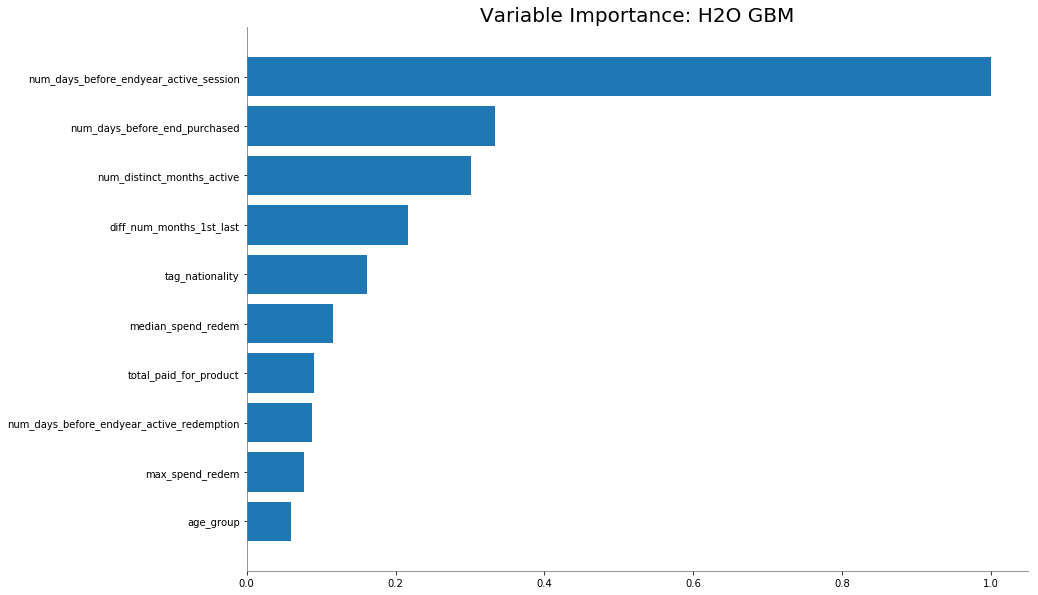

In [0]:
m2.varimp_plot()

In [0]:
m0.explain()

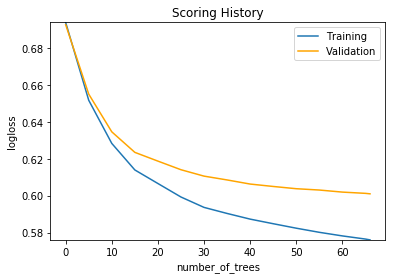

In [0]:
m2.plot()

In [0]:
m2.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,num_days_before_endyear_active_session,2010.480835,1.000000,0.344615
1,num_days_before_end_purchased,671.873047,0.334185,0.115165
2,num_distinct_months_active,607.181458,0.302008,0.104077
3,diff_num_months_1st_last,435.305664,0.216518,0.074615
4,tag_nationality,325.356293,0.161830,0.055769
5,median_spend_redem,233.374039,0.116079,0.040003
6,total_paid_for_product,182.606110,0.090827,0.031300
7,num_days_before_endyear_active_redemption,177.005295,0.088041,0.030340
8,max_spend_redem,155.187424,0.077189,0.026601
9,age_group,119.342957,0.059360,0.020457


In [0]:
# Refer
# https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/88328598478746/1288525732792552/576313034656021/latest.html
#  https://www.h2o.ai/blog/h2os-automl-in-spark/
#     http://docs.h2o.ai/sparkling-water/3.0/latest-stable/doc/ml/sw_automl.html

In [0]:
#todo predictions
predicted = model.transform(for_predictions)

In [0]:
%sql
select distinct location_name from churn.train_data_2019_2020_all_loc

location_name
Singapore
Jeddah
Qatar
Kuwait
Durban
Cape Town
Riyadh
Oman
Eastern Province
Johannesburg


In [0]:
%sql
select count(*)  from churn.testing_data_2019_2020_all_loc where location_id=1

count(1)
86262
